In [22]:
#Import library
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [23]:
# Load Dataset

data_set = datasets.load_breast_cancer()
X = data_set.data
y= data_set.target


In [24]:

data_set

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [25]:
#show data fields
print('\nClassification outcome:')
print(data_set.target_names)


Classification outcome:
['malignant' 'benign']


In [26]:
#create training and test data sets
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size =0.25, random_state = 0)

In [27]:
#initialise a new scaling
sc = StandardScaler()

In [28]:
#set up the scaler 
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
#Apply the scaler to the training 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [30]:
len(X_train)

426

In [31]:
#run logistics regression model from sklearn
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100, random_state = 0)
lr.fit(X_train_std,y_train)

/Users/josesanchez/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = lr.predict(X_test_std)


In [33]:
#display results
prediction = pd.DataFrame()
prediction['actual']=data_set.target_names[y_test]
prediction['predicted']=data_set.target_names[y_pred]
prediction['correct'] = prediction['actual'] == prediction['predicted'] 

In [34]:
print('n\Detailed results for first 20')
print(prediction.head(50))

n\Detailed results for first 20
       actual  predicted  correct
0   malignant  malignant     True
1      benign     benign     True
2      benign     benign     True
3      benign     benign     True
4      benign     benign     True
5      benign     benign     True
6      benign     benign     True
7      benign     benign     True
8      benign     benign     True
9      benign     benign     True
10     benign     benign     True
11     benign     benign     True
12     benign     benign     True
13     benign  malignant    False
14     benign     benign     True
15  malignant  malignant     True
16     benign     benign     True
17  malignant  malignant     True
18  malignant  malignant     True
19  malignant  malignant     True
20  malignant  malignant     True
21  malignant  malignant     True
22     benign     benign     True
23     benign     benign     True
24  malignant  malignant     True
25     benign     benign     True
26     benign     benign     True
27  malignant  m

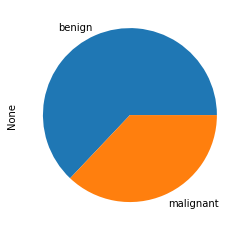

In [36]:
prediction.groupby('actual').size().plot(kind='pie')

In [37]:
#accuracy 
correct = (y_test == y_pred).sum()
incorrect= (y_test != y_pred).sum()
accuracy = correct / (correct + incorrect) * 100
f'Percent accuracy: {round(accuracy,2)}' 

'Percent accuracy: 93.71'